# rossmann-toolbox tutorial
---
In the case of problems do not hesitate to [contact us!](https://lbs.cent.uw.edu.pl)


In [1]:
from rossmann_toolbox import RossmannToolbox
import matplotlib.pylab as plt

# Structure-based predictions require FoldX, an external tool that can be obtained at 
# http://foldxsuite.crg.eu/academic-license-info
# Note that the FoldX academic license expires periodically and has to be renewed.
PATH_FOLDX = '/home/users/sdunin/apps/foldx5/foldx'

# The bab core regions can be either provided as an input or detected with the rossmann-toolbox. 
# The predictions can be made either with a deep learning tool included in the package or with 
# the HHpred tool. In the latter case, the HHpred path has to be provided.
PATH_HHPRED = '/opt/apps/hh-suite/bin/hhsearch'


Using backend: pytorch


In [2]:
rtb = RossmannToolbox(use_gpu=True, path_foldx_bin = PATH_FOLDX, 
                                    hhsearch_loc = PATH_HHPRED)

Loaded 4 structure-based prediction models.


## Sequence-based predictions

#### The b-a-b core sequence is provided by the user `mode='core'`

In [3]:
# Example obtained from Bae et al., 2010

data = {'seq1': 'AGVRLGDPVLICGAGPIGLITMLCAKAAGACPLVITDIDEGR', # WT, binds NAD
        'seq2': 'AGVRLGDPVLICGAGPIGLITMLCAKAAGACPLVITSRDEGR'} # D211S, I212R mutant, binds NADP

preds, imps = rtb.predict(data, mode='core', importance=True)
preds

{'seq1': {'FAD': 0.00053916854,
  'FAD_std': 0.0010577103,
  'NAD': 0.9992666,
  'NAD_std': 0.0014605422,
  'NADP': 3.2585238e-05,
  'NADP_std': 5.041259e-05,
  'SAM': 0.00018488245,
  'SAM_std': 0.00035966522},
 'seq2': {'FAD': 1.6376638e-05,
  'FAD_std': 2.7080328e-05,
  'NAD': 0.017441133,
  'NAD_std': 0.031513363,
  'NADP': 0.99435437,
  'NADP_std': 0.010009565,
  'SAM': 3.4941448e-05,
  'SAM_std': 4.8398204e-05}}

#### The per-residue importances `importance='True'`

<ErrorbarContainer object of 3 artists>

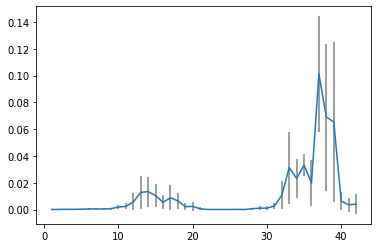

In [4]:
# Which residues made the greatest contribution in predicting the WT as NAD-binding?
seq_len = len(data['seq1'])
plt.errorbar(list(range(1, seq_len+1)),
             imps['seq1']['NAD'][0], yerr=imps['seq1']['NAD'][1], ecolor='grey')


#### The b-a-b core will be predicted in the full-length sequence `mode='seq'`

In [5]:
data = {'3m6i_A': 'MASSASKTNIGVFTNPQHDLWISEASPSLESVQKGEELKEGEVTVAVRSTGICGSDVHFWKHGCIGPMIVECDHVLGHESAGEVIAVHPSVKSIKVGDRVAIEPQVICNACEPCLTGRYNGCERVDFLSTPPVPGLLRRYVNHPAVWCHKIGNMSYENGAMLEPLSVALAGLQRAGVRLGDPVLICGAGPIGLITMLCAKAAGACPLVITDIDEGRLKFAKEICPEVVTHKVERLSAEESAKKIVESFGGIEPAVALECTGVESSIAAAIWAVKFGGKVFVIGVGKNEIQIPFMRASVREVDLQFQYRYCNTWPRAIRLVENGLVDLTRLVTHRFPLEDALKAFETASDPKTGAIKVQIQSLE'}

# Core region detection with in-built deep-learning model
preds = rtb.predict(data, mode='seq', core_detect_mode='dl', importance=False)
preds




{'3m6i_A': {'FAD': 0.00089554524,
  'FAD_std': 0.0017580233,
  'NAD': 0.998446,
  'NAD_std': 0.0030978944,
  'NADP': 0.00015508439,
  'NADP_std': 0.00028932205,
  'SAM': 0.00025443893,
  'SAM_std': 0.00049188413,
  'sequence': 'AGVRLGDPVLICGAGPIGLITMLCAKAAGACPLVITDIDEGRL'}}

In [6]:
# Core region detection with HHsearch tool of the HHpred package 
# Note that the two approaches may yield different results
preds = rtb.predict(data, mode='seq', core_detect_mode='hhsearch', importance=False)
preds

{'3m6i_A': {'FAD': 0.001070828,
  'FAD_std': 0.0016058232,
  'NAD': 0.99925435,
  'NAD_std': 0.0013703959,
  'NADP': 0.0001793908,
  'NADP_std': 0.00020505667,
  'SAM': 0.00024647798,
  'SAM_std': 0.00047857413,
  'sequence': 'VLICGAGPIGLITMLCAKAAGACPLVITDIDE'}}

## Structure-based predictions

In [7]:
# We don't want to see PDB parsing warnings
import warnings; warnings.filterwarnings("ignore")

#### The b-a-b core will be predicted in the input structure `mode='seq'`

In [8]:
# Here, the input structure and all intermediate files will be stored
# Please follow naming format XXXX_Y.pdb where XXXX is protein id and Y is a chain
path_to_structures = '/home/users/sdunin/calc/Rossmann/toolbox-test/data/seq_mode'

# Define chains that will be evaluated. If the structure is not present in the directory it will be downloaded
chains_to_use = ['3m6i_A']

# The WT structure was predicted (as in the case of sequence-based mode) to bind NAD
preds = rtb.predict_structure(path_to_structures, chains_to_use, mode='seq', core_detect_mode='dl')
preds

Preparing 3m6i_A for FoldX. This may take a while but the result will be cached.
TER added to 3m6i_A.pdb
Calculating FoldX features for 3m6i_A_Repair.pdb...


[{'NAD': 0.9997788071632385,
  'NADP': 0.0018194946460425854,
  'SAM': 0.0034198295325040817,
  'FAD': 3.619955532485619e-05,
  'cofactor': 'NAD',
  'seq': 'AGVRLGDPVLICGAGPIGLITMLCAKAAGACPLVITDIDEGRL',
  'NAD_std': 0.00038787940866313875,
  'NADP_std': 0.002135709160938859,
  'SAM_std': 0.0041174632497131824,
  'FAD_std': 3.949692836613394e-05}]

#### The b-a-b core is provided by the user `mode='core'`

In [9]:
path_to_structures = '/home/users/sdunin/calc/Rossmann/toolbox-test/data/core_mode'

# The 3m6i_A.pdb file contains a model obtained with Modeller in which the two mutations D211S, I212R
# were introduced. Not that this is a model of the whole structure, not just the core region. 
# The full structure has to be used, as the structural features are contextual (e.g. burial of a residue
# can be correctly assessed only in the context of the whole structure)
chains_to_use = ['3m6i_A']


In [10]:
# The mutated structure was predicted (as in the case of sequence-based mode) to bind NADP
preds = rtb.predict_structure(path_to_structures, chains_to_use, mode='core', 
                              core_list=['AGVRLGDPVLICGAGPIGLITMLCAKAAGACPLVITSRDEGR'])
preds

Preparing 3m6i_A for FoldX. This may take a while but the result will be cached.
Calculating FoldX features for 3m6i_A_Repair.pdb...


[{'NAD': 0.07392216473817825,
  'NADP': 0.9937467575073242,
  'SAM': 0.003925769589841366,
  'FAD': 0.00022765068570151925,
  'cofactor': 'NADP',
  'seq': 'AGVRLGDPVLICGAGPIGLITMLCAKAAGACPLVITSRDEGR',
  'NAD_std': 0.1220666915178299,
  'NADP_std': 0.0077379010617733,
  'SAM_std': 0.0040618558414280415,
  'FAD_std': 0.0002890863688662648}]

#### The structure-based method also returns the per-residue importances `importance='True'`

In [11]:
# User-defined core region
core_seq = 'AGVRLGDPVLICGAGPIGLITMLCAKAAGACPLVITSRDEGR'

preds, imps = rtb.predict_structure(path_to_structures, chains_to_use, mode='core', importance=True, 
                              core_list=[core_seq])

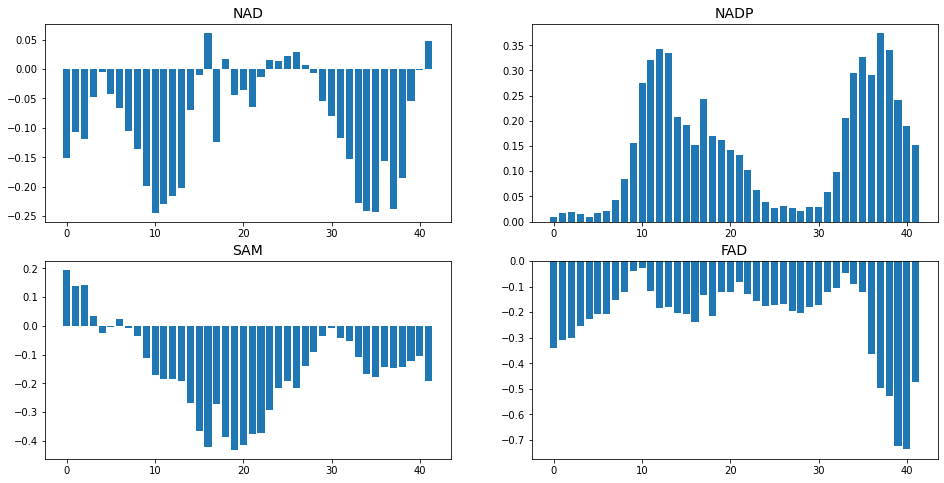

In [12]:
COFACTORS = ['NAD', 'NADP', 'SAM', 'FAD']
single_emb = imps[0].mean(0).cpu().numpy()

fig, ax = plt.subplots(2,2,figsize=(16, 8))
ax = ax.ravel()
for i in range(4):
    ax[i].set_title(COFACTORS[i], fontsize=14)
    ax[i].bar(height=single_emb[:, i], x = list(range(single_emb[:,i].size)))

#### Upon executing `predict_structure` the structural data will be stored in `rtb.feats3d`

In [13]:
from rossmann_toolbox.utils.struct_loader import ShowNxGraph
sng = ShowNxGraph()
import networkx as nx
import seaborn as sns
import numpy as np

In [14]:
def scale_embeddings(emb):  
    emb_abs_max = np.abs(emb).max()
    sigm = 1/(1 + np.exp(-emb.sum(0)))
    x = 0.5 + 0.5*(np.clip(emb/emb_abs_max, a_min=-1, a_max=sigm))
    x *= 255
    return x

def color_nodes(arr, cmap, cof):
    colored_nodes = dict()
    for i, val in enumerate(arr[:, cof]):
        colored_nodes[i] = cmap(val)
    return colored_nodes

In [15]:
node_size = 350
node_labels = [f'{i}{j}' for i,j in zip(list(core_seq), rtb.feats3d['dataframe'].iloc[0].pdb_list)]

mgr_cmap = sns.diverging_palette(240, 125, s=80, l=55, n=5, as_cmap=True)
scaled_embeddings = scale_embeddings(single_emb).astype(int)
NAD  = color_nodes(scaled_embeddings, mgr_cmap, 0)
NADP = color_nodes(scaled_embeddings, mgr_cmap, 1)
SAM  = color_nodes(scaled_embeddings, mgr_cmap, 2)
FAD  = color_nodes(scaled_embeddings, mgr_cmap, 3)

In [16]:
idx = rtb.feats3d['dataframe'].iloc[0].name
g = nx.Graph(rtb.feats3d['contact_maps'][idx][0] < 7)
pos = nx.kamada_kawai_layout(g)

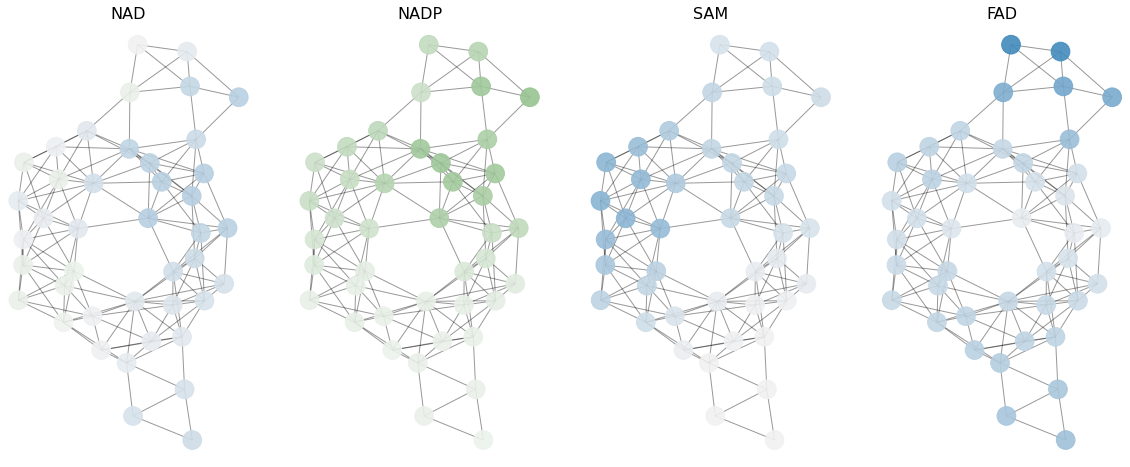

In [17]:
fig, ax = plt.subplots(1,4,figsize=(20,8))
ax = ax.ravel()
_ = sng.draw(g=g, residue_scores=NAD,  node_labels=None, node_positions=pos, node_size=node_size, ax=ax[0]); ax[0].set_title('NAD', fontsize=16);
_ = sng.draw(g=g, residue_scores=NADP, node_labels=None, node_positions=pos, node_size=node_size, ax=ax[1]); ax[1].set_title('NADP', fontsize=16);
_ = sng.draw(g=g, residue_scores=SAM,  node_labels=None, node_positions=pos, node_size=node_size, ax=ax[2]); ax[2].set_title('SAM', fontsize=16);
_ = sng.draw(g=g, residue_scores=FAD,  node_labels=None, node_positions=pos, node_size=node_size, ax=ax[3]); ax[3].set_title('FAD', fontsize=16);
for i in range(4):
    ax[i].set_axis_off()
fig.patch.set_facecolor('white')

---